In [ ]:
"""
Members:
    Mark Gerald Guerrero
    Quinn Harvey Pineda
    Shania Jarrisse Villanueva

"""

In [59]:
# import kagglehub
# import os
# import shutil

# # Define the path where you want to download the dataset
# desired_path = "C:/repos/ECDS-NeuralNets/Day 1/Dataset"

# # Check if the directory exists, if not create it
# if not os.path.exists(desired_path):
#     os.makedirs(desired_path)

# # Download latest version (it will download to the default location)
# default_path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

# # Move the downloaded files to your desired directory
# shutil.move(default_path, desired_path)

# print(desired_path)

In [2]:
# Let's check and see the data
import pandas as pd
data = pd.read_csv(r'.\predictive_maintenance.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Target
0    9661
1     339
Name: count, dtype: int64


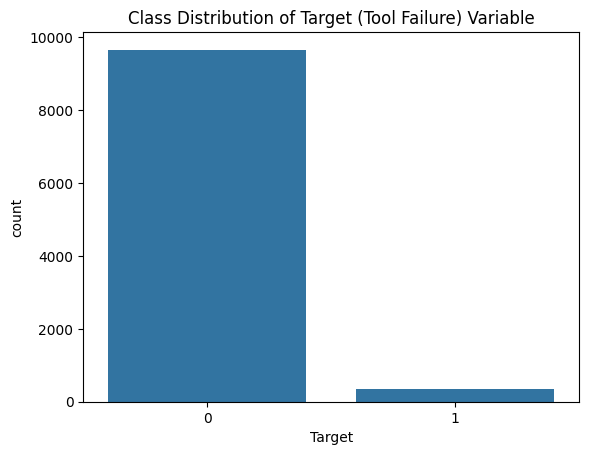

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data['Target'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='Target', data=data)
plt.title('Class Distribution of Target (Tool Failure) Variable')
plt.show()

In [6]:
dupes = data[data.duplicated()]
dupes_sum = data.duplicated().sum()
print("sum of duplicated rows:", dupes_sum)
print("duplicated rows:", dupes)

sum of duplicated rows: 0
duplicated rows: Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []


In [7]:
# Filter the dataset for rows where the target is equal to a specific value (e.g., 1)
target_value = 0
subset = data[data['Target'] == target_value]

# Check for duplicates in the subset
duplicates_in_target_value = subset[subset.duplicated(keep=False)]

# Display duplicates
print("Dupes Counter with Target Variable = 1:", len(duplicates_in_target_value))
print(f"Duplicates for target value {target_value}:")
duplicates_in_target_value

Dupes Counter with Target Variable = 1: 0
Duplicates for target value 0:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [8]:
# inplace=True: Makes the change directly in the original DataFrame without needing to reassign it.
data_deduped = data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data[data.duplicated()]

0


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


Target
0    9661
1     339
Name: count, dtype: int64


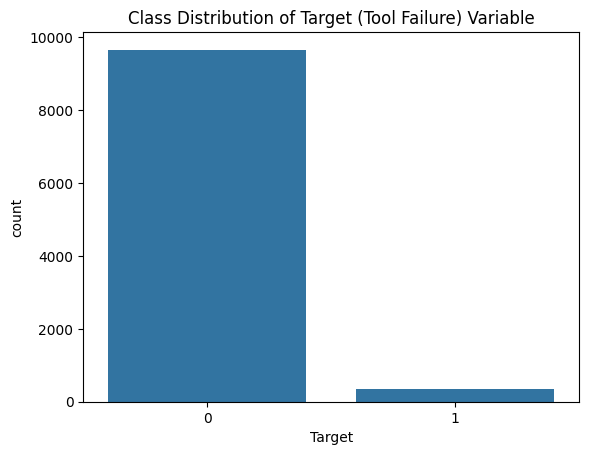

In [9]:
# Now let's check again the distribution after deduplication
print(data['Target'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='Target', data=data)
plt.title('Class Distribution of Target (Tool Failure) Variable')
plt.show()

### We can see that after deduplication, still the second class of the target variable is largely imbalanced from the other one. We are dealing with extreme class imbalance.

In [10]:
# Let's conduct an undersampling method to balance out our data
from imblearn.under_sampling import RandomUnderSampler
X = data.drop('Target', axis=1)
y = data['Target']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

Target
0    339
1    339
Name: count, dtype: int64


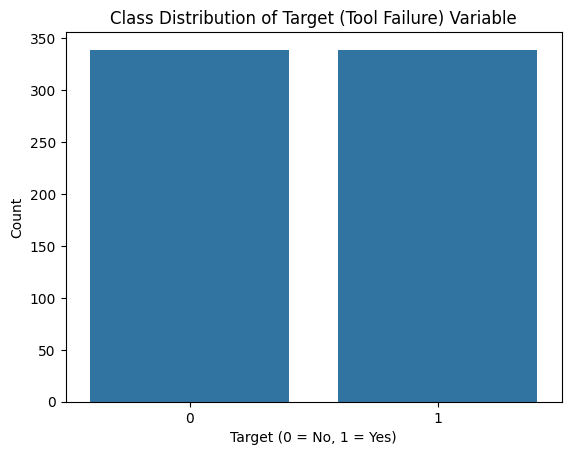

In [11]:
# Check the distribution of the resampled target variable
print(y_resampled.value_counts())

# Visualize the distribution of the resampled target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Class Distribution of Target (Tool Failure) Variable')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### **Advantages of Undersampling:**
Simplicity:<br>It’s easy to implement and understand.
Reduced Overfitting:<br>No synthetic data means less risk of overfitting to artificial patterns.
Lower Computational Cost:<br>Smaller datasets mean faster training.
### **Potential Drawbacks:**
Loss of Information:<br>You discard a significant amount of the majority class data, which could result in losing valuable patterns.
Less Effective for Complex Data:<br>If the majority class has complex structure, undersampling may miss important nuances.
### **When Undersampling is a Good Choice:**
Large Majority Class:<br>If you have a massive majority class, removing data is feasible.
Fast Prototyping:<br>Useful when you want quick results without complex tuning.
Balanced Complexity:<br>Works well when the minority class is distinct and well-separated.


In [12]:
# Concatenate the resampled features and target variable to form a new dataframe
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the first few rows of the resampled data
data_resampled

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target
6130,6131,L53310,L,301.0,310.9,1473,44.2,116,No Failure,0
9063,9064,L56243,L,297.2,308.3,1419,39.7,115,No Failure,0
2751,2752,L49931,L,299.7,309.1,1417,50.1,187,No Failure,0
5744,5745,H35158,H,302.2,311.5,1482,42.6,16,No Failure,0
3779,3780,L50959,L,302.3,311.0,1657,31.1,3,No Failure,0
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,Tool Wear Failure,1
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,Power Failure,1
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,Overstrain Failure,1
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,Overstrain Failure,1


In [13]:
# Check class distribution of the target variable 'diabetes'
class_distribution = data_resampled['Target'].value_counts(normalize=True)
print(class_distribution)

Target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [14]:
print(data_resampled['Target'].unique())
print(data_resampled['Tool wear [min]'].unique())
print(data_resampled['Type'].unique())

[0 1]
[116 115 187  16   3   5 179 190 199 213 144  39  71  75 123  45  57 137
 111 126 146  83 114 197  90 112 148 121 211  29 210 170  50  22  33 160
  23  12 107  30 101  20 186 124 185  78 175 139 149 106  35 147 109 102
   2  64  36   9 176 215  47 219   0  27 198 136  76   7  11  38 142 177
 145  53 141  79  70 181  85  31   4  66  56  40  55 151  96 131  65 188
 193 155 166 130 180 100  54  92  49 133 159  13 205   6 120  98 178 129
 218 184 196 189 182 156  72  48 173 221  44 122  19 223 191 154 110  59
  32 161 105 202  87 135  68 104 172 165 125 158 134 163  84  77 108  17
 119  52  69 171  15  94 192  24  42  93 200  89 195  80 128  97 138  37
 113  82  63 150  88  61 143 208 216  86 203 127 118 222 206  18 153 194
 226 228 212 220 225 209  67 207 231 246  81 183  21 214  34 169 235 204
  73   8  41 174 229 233  10 168  25 117 164 234  60  51  62  26 251 253
 227 217 232  91 201 238]
['L' 'H' 'M']


# Types of Encoding in Machine Learning

Encoding categorical variables is a crucial step in preparing data for machine learning models. Below are the most common encoding techniques, when to use them, and how they can benefit models, especially in cases with non-normally distributed data.

## 1. **Label Encoding**
- **Description**: Converts each unique category in a column into a numerical label (integer). For example, a column with categories like `['Male', 'Female', 'Other']` could be encoded as `[0, 1, 2]`.
- **When to Use**:
  - Works well for ordinal data (categories with a meaningful order).
  - Use when the model can interpret categorical variables as ordered.
- **Best for**:
  - Decision trees, random forests, and gradient boosting models.
  - Ordinal variables (e.g., `low`, `medium`, `high`).
- **Benefit for Non-Normally Distributed Data**:
  - Label encoding doesn’t distort the relationships between categories by converting them into integers, making it more appropriate for some non-normally distributed datasets where the range and relationships are meaningful.

## 2. **One-Hot Encoding**
- **Description**: Creates a binary column for each category in the original variable. Each row has a `1` in the column corresponding to its category, and `0` in others.
  - Example: If you have the categories `['Male', 'Female', 'Other']`, one-hot encoding will create three columns: `Male`, `Female`, `Other`, where each row has one `1` and the rest are `0`.
- **When to Use**:
  - Best for nominal data (categories without any inherent order).
  - Useful when the categories do not have a natural ranking.
- **Best for**:
  - Linear models, neural networks, and algorithms that can interpret binary features (e.g., logistic regression, support vector machines, etc.).
  - Avoid multicollinearity by using the `drop_first=True` option.
- **Benefit for Non-Normally Distributed Data**:
  - One-hot encoding is particularly effective for categorical variables in datasets that are not normally distributed. By transforming each category into a separate binary feature, it allows models to learn from each distinct category without assuming any numerical relationship, which is crucial in the absence of normal distribution.

## 3. **Ordinal Encoding**
- **Description**: Similar to label encoding, but specifically used for ordinal data where there is a natural order (e.g., `low`, `medium`, `high`).
- **When to Use**:
  - When categories have an inherent order.
  - Avoids the risk of treating categories as unrelated as with one-hot encoding.
- **Best for**:
  - Decision trees and models that can handle ordinal relationships.
  - Models where the order of categories has meaning.
- **Benefit for Non-Normally Distributed Data**:
  - Ordinal encoding respects the natural order of data and does not assume the data follows any normal distribution. This is beneficial in datasets with skewed or non-normal distributions, where the relationship between categories and the target is more important than distributional assumptions.

## 4. **Binary Encoding**
- **Description**: Combines the benefits of both label encoding and one-hot encoding. It converts categories into binary digits. This method is more compact and efficient than one-hot encoding.
- **When to Use**:
  - When there are a large number of categories, and one-hot encoding would lead to too many columns (high cardinality).
  - Suitable when reducing dimensionality is necessary.
- **Best for**:
  - High-cardinality categorical features, such as product IDs, zip codes, etc.
  - Algorithms like XGBoost and LightGBM, which can handle the binary features effectively.
- **Benefit for Non-Normally Distributed Data**:
  - For datasets with high cardinality and skewed distributions, binary encoding reduces the number of features while retaining the categorical information. This helps models avoid overfitting to noise in non-normally distributed data.

## Choosing the Best Encoding Method

- **For Ordinal Data**: Use **Label Encoding** or **Ordinal Encoding** since there is an inherent order to the categories.
- **For Nominal Data with Few Categories**: Use **One-Hot Encoding** as it is straightforward and widely accepted in most models.
- **For High Cardinality Data**: Use **Binary Encoding** or **Frequency Encoding** to reduce dimensionality and prevent the curse of dimensionality.
- **For High Cardinality with Strong Target Relationships**: Use **Target Encoding** when there is a strong correlation between categorical values and the target variable.
- **For Non-Normally Distributed Data**: Encoding methods like **Target Encoding**, **Binary Encoding**, and **Frequency Encoding** can be particularly effective, as they focus on the actual relationships and frequencies rather than assuming normality in the data.


In [15]:
# One-Hot Encoding for both 'Target' and 'Tool Type'
data = pd.get_dummies(data_resampled, columns=['Target', 'Type'], drop_first=True)

num_bins = 4
# Calculate the bin edges based on the unique values
bins = pd.cut(data_resampled['Tool wear [min]'], bins=num_bins, retbins=True)[1]

# Define labels (must match number of bins-1)
labels = [1, 2, 3, 4]  # The number of labels should be 1 less than the number of bins

# Apply binning
data_resampled['tool_wear_ordinal'] = pd.cut(
    data_resampled['Tool wear [min]'],
    bins=bins,
    labels=labels,
    include_lowest=True
).astype(int)

# Check the result
print(data_resampled[['Tool wear [min]', 'tool_wear_ordinal']].head())

      Tool wear [min]  tool_wear_ordinal
6130              116                  2
9063              115                  2
2751              187                  3
5744               16                  1
3779                3                  1


In [16]:
data.dtypes

UDI                          int64
Product ID                  object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Failure Type                object
Target_1                      bool
Type_L                        bool
Type_M                        bool
dtype: object

In [17]:
# Convert any boolean columns to integers (True = 1, False = 0)
boolean_columns = data.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    data[col] = data[col].astype(int)
# Check the result to see if it properly encoded the columns
data.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target_1,Type_L,Type_M
6130,6131,L53310,301.0,310.9,1473,44.2,116,No Failure,0,1,0
9063,9064,L56243,297.2,308.3,1419,39.7,115,No Failure,0,1,0
2751,2752,L49931,299.7,309.1,1417,50.1,187,No Failure,0,1,0
5744,5745,H35158,302.2,311.5,1482,42.6,16,No Failure,0,0,0
3779,3780,L50959,302.3,311.0,1657,31.1,3,No Failure,0,1,0


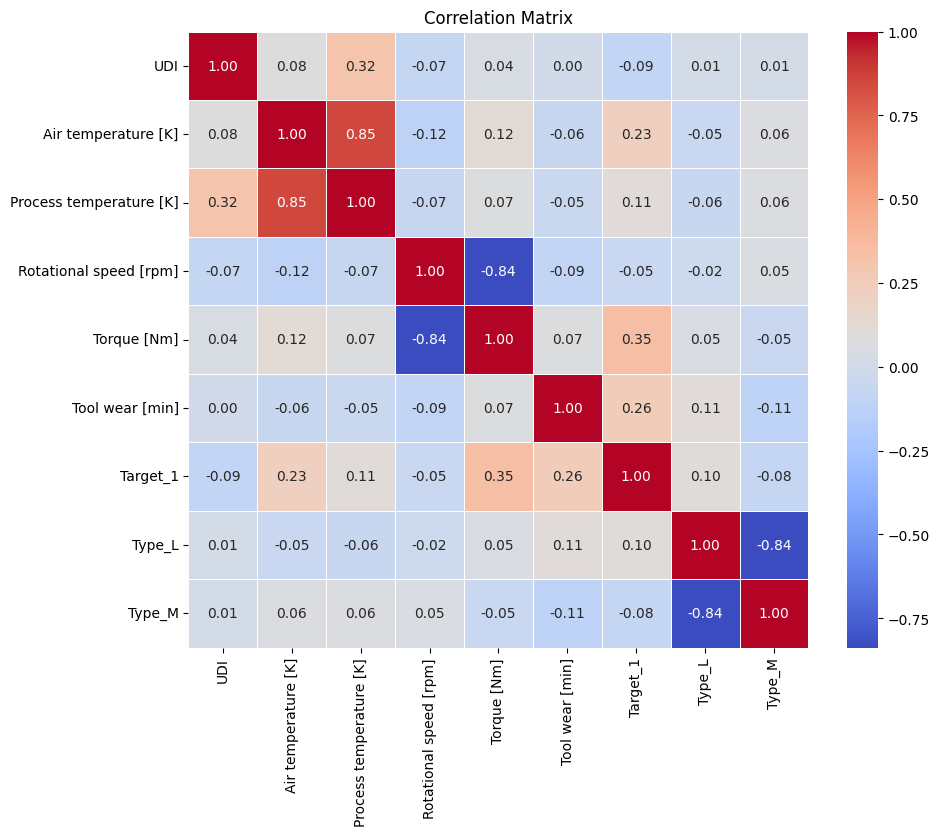

In [18]:
numeric_data = data.select_dtypes(include=['number'])
# Run correlation analysis
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Why Perform Correlation Analysis Before Training:

1. **Feature Selection**:  
   Correlation analysis helps identify highly correlated features. If two features are highly correlated (i.e., multicollinearity), it can cause problems in models like linear regression or decision trees because they might "overlap" in terms of information. By removing or combining these features beforehand, you can improve the model's performance and interpretability.

2. **Data Understanding**:  
   Understanding the relationships between features helps in deciding which features are important for your model. It gives insights into the data that can guide feature engineering or preprocessing steps.

3. **Improving Model Efficiency**:  
   Reducing multicollinearity can make your model training more stable, and selecting the most relevant features can improve model performance, especially for algorithms like logistic regression or support vector machines (SVMs).


### Why Low Correlation Is Often Desired:

1. **Avoiding Multicollinearity:**
   - **Multicollinearity** occurs when two or more features are highly correlated with each other. In linear models (like **linear regression**), this can cause problems because the model struggles to distinguish the individual effect of each feature on the target variable. This leads to unstable estimates of coefficients and can make the model's predictions less reliable.
   - For example, if two features, `Height` and `Weight`, are highly correlated, both provide similar information. Including both in the model could inflate variance and lead to overfitting.

2. **Improving Model Interpretability:**
   - When features are highly correlated, it's harder to understand which feature is actually driving the model's predictions. By selecting features that are less correlated, you can more easily interpret the impact of each feature on the outcome.
   - For example, if `Age` and `Years of Experience` are highly correlated, you might want to select one, as both might contribute similar information to the prediction.

3. **Enhancing Model Performance:**
   - Reducing **multicollinearity** can help improve the **accuracy** and **stability** of many machine learning models, such as **logistic regression**, **support vector machines (SVM)**, and others. These models tend to perform better with independent features that provide unique information.
   - For example, **decision trees** and **random forests** can handle correlated features better, but high correlation might still lead to overfitting or redundant information.

4. **Reducing Overfitting:**
   - By eliminating highly correlated features, you reduce the risk of overfitting, where the model memorizes the training data, including noise, instead of generalizing well to new, unseen data.

### How to Handle Correlated Features:

- **Remove one of the correlated features**: If two features are highly correlated (e.g., correlation coefficient > 0.8), you might choose to drop one of them.
- **Feature Engineering**: Combine the correlated features into a new feature that captures the combined information (e.g., averaging the two features or performing dimensionality reduction).
- **Principal Component Analysis (PCA)**: This technique transforms correlated features into a smaller set of uncorrelated features, called principal components, which can help reduce multicollinearity.

### Summary:
- It's generally a good practice to reduce the correlation between features before training, especially when using models sensitive to multicollinearity.
- This leads to better model interpretability, stability, and performance.


### How to Determine if Features Are Highly Correlated

To determine if features are **highly correlated**, you typically calculate the **correlation coefficient** between pairs of features. The correlation coefficient quantifies the strength and direction of the relationship between two variables.

### Steps to Determine High Correlation:

1. **Calculate the Correlation Coefficient:**
   - The most common measure is **Pearson's correlation coefficient** (for continuous variables), which ranges from -1 to 1. <br>
   
The formula for Pearson's correlation coefficient \( r \) is:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Where:
- $x_i$ and $y_i$ are the individual sample points in datasets $x$ and $y$,
- $\bar{x}$ and $\bar{y}$ are the means of the datasets $x$ and $y$,
- $n$ is the number of data points.

Pearson's correlation coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no linear correlation.
 <br>

   - **+1**: Perfect positive correlation (as one feature increases, the other increases in exact proportion). <br>
   - **-1**: Perfect negative correlation (as one feature increases, the other decreases in exact proportion). <br>
   - **0**: No correlation. <br>
   - **Between 0.5 and 1 (or -0.5 and -1)**: Strong positive (or negative) correlation. <br>
   - **Between 0.3 and 0.5 (or -0.3 and -0.5)**: Moderate correlation. <br>
   - **Below 0.3**: Weak correlation. <br>

2. **Visualize Correlation:**
   - You can visualize the correlation matrix to easily identify which features are highly correlated with each other.

3. **Check the Correlation Matrix:**
   - A **correlation matrix** is a table showing correlation coefficients between many variables. This can be computed for all pairs of features in your dataset.

In [19]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Split the data into X (features) and y (target)
X = data.drop(columns=['Target_1'])
y = data['Target_1']

# Step 1: Split the data into training and test data (80% training, 20% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Standard Scaler Formula

The formula for standard scaling (Z-score normalization) is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ is an individual data point,
- $ \mu $ is the mean of the data,
- $ \sigma $ is the standard deviation of the data,
- $ z $ is the scaled value (standardized score).

This transformation scales the data so that it has:
- A **mean** of 0,
- A **standard deviation** of 1.

### Significance of Standard Scaling

1. **Normalization for Comparison**: Standard scaling helps bring different features to a comparable scale, especially when the features have different units (e.g., height in cm and weight in kg). This makes sure that no feature dominates due to its scale in models such as linear regression or SVMs.

2. **Improves Model Performance**: Many machine learning algorithms, such as k-nearest neighbors (KNN), support vector machines (SVM), and gradient descent-based algorithms, perform better when the data is standardized. It helps the model converge faster and can lead to better performance.

3. **Ensures Assumptions Hold**: Algorithms like linear regression or logistic regression assume that the data follows a normal distribution. Standard scaling helps make the data more normal (if it isn't already), allowing these algorithms to function as expected.


In [20]:
from sklearn.preprocessing import StandardScaler

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on the training data (only numerical columns)
X_train_scaled = X_train[numerical_cols].copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])

# Transform the test data using the same scaler
X_test_scaled = X_test[numerical_cols].copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])

# Combine the scaled numerical columns with the original categorical columns (unchanged)
X_train_final = X_train_scaled.join(X_train[categorical_cols])
X_test_final = X_test_scaled.join(X_test[categorical_cols])

# Select only numeric columns (int64 and float64)
X_train_final_numeric = X_train_final.select_dtypes(include=['float64', 'int64'])
X_test_final_numeric = X_test_final.select_dtypes(include=['float64', 'int64'])
# Remove '[' ']' '<'
X_train_final_numeric.columns = X_train_final_numeric.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test_final_numeric.columns = X_test_final_numeric.columns.str.replace(r'[^\w\s]', '', regex=True)


# Check the shapes of the splits and the class distribution
print(f"Train shape: {X_train_final.shape}")
print(f"Test shape: {X_test_final.shape}")
print(f"Class distribution in y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in y_test: \n{y_test.value_counts(normalize=True)}")
print()
print(X_train_final_numeric)
print()
print(X_test_final_numeric)


Train shape: (542, 10)
Test shape: (136, 10)
Class distribution in y_train: 
Target_1
1    0.5
0    0.5
Name: proportion, dtype: float64
Class distribution in y_test: 
Target_1
1    0.5
0    0.5
Name: proportion, dtype: float64

           UDI  Air temperature K  Process temperature K  \
4621 -0.086072           1.238484               0.729612   
8850  1.519126          -1.396389              -0.842468   
1280 -1.354212          -1.054831              -0.485177   
2185 -1.010702          -0.322922              -0.556635   
2332 -0.954905          -0.615686              -1.199759   
...        ...                ...                    ...   
3    -1.838922          -1.103625              -1.128301   
7254  0.913333          -0.078953               0.157946   
2313 -0.962117          -0.664480              -0.985384   
1595 -1.234648          -1.201213              -1.414133   
4998  0.057026           1.531247               1.872942   

      Rotational speed rpm  Torque Nm  Tool wear m

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        68
           1       0.85      0.78      0.82        68

    accuracy                           0.82       136
   macro avg       0.83      0.82      0.82       136
weighted avg       0.83      0.82      0.82       136

--------------------------------------------------


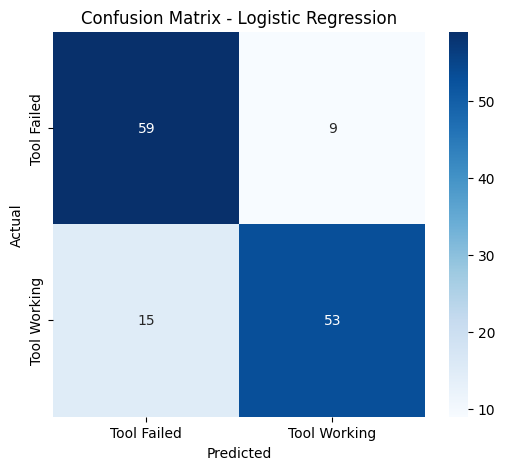

--------------------------------------------------
AUC-ROC for Logistic Regression: 0.92
--------------------------------------------------


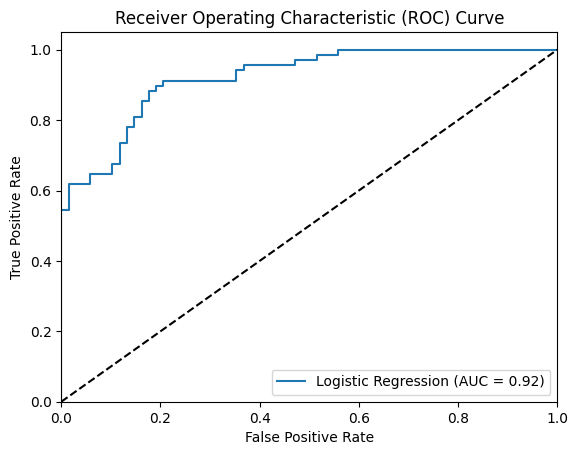

Model: SVM
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.89      0.85      0.87        68

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.87       136
weighted avg       0.88      0.88      0.87       136

--------------------------------------------------


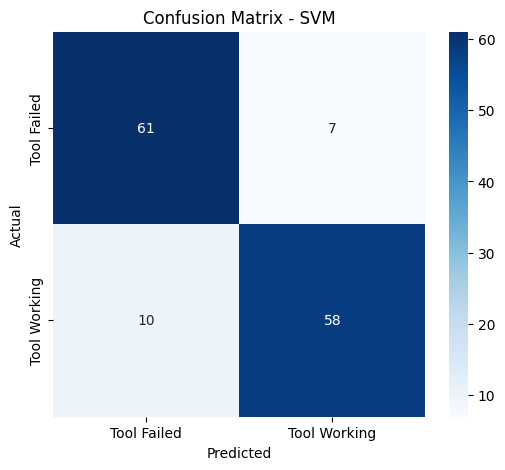

--------------------------------------------------
AUC-ROC for SVM: 0.97
--------------------------------------------------


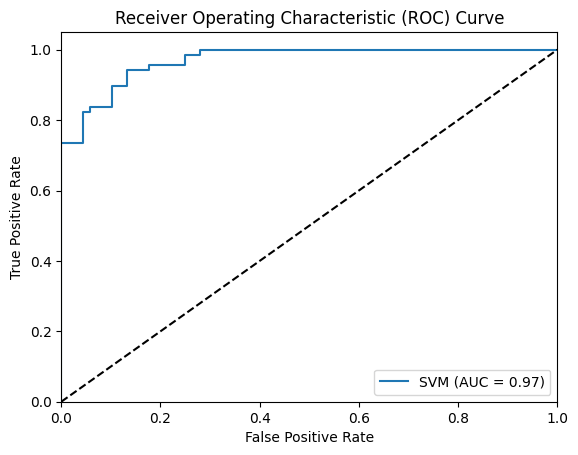

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        68
           1       0.88      0.88      0.88        68

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.88       136
weighted avg       0.88      0.88      0.88       136

--------------------------------------------------


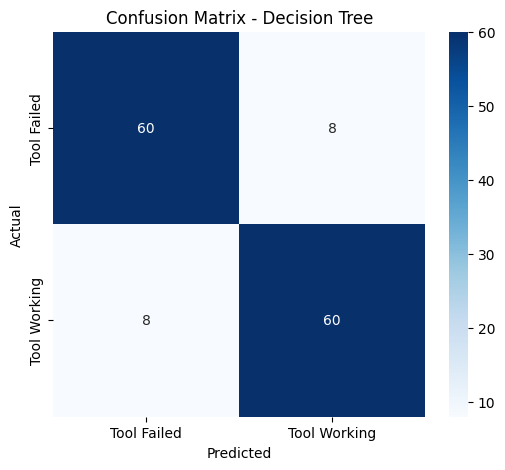

--------------------------------------------------
AUC-ROC for Decision Tree: 0.88
--------------------------------------------------


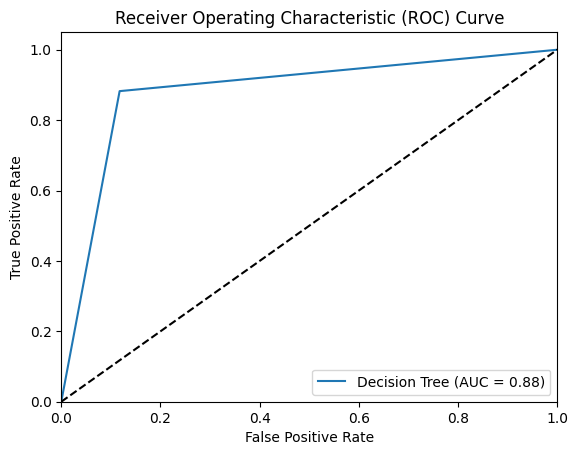

Model: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.93      0.93      0.93        68

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136

--------------------------------------------------


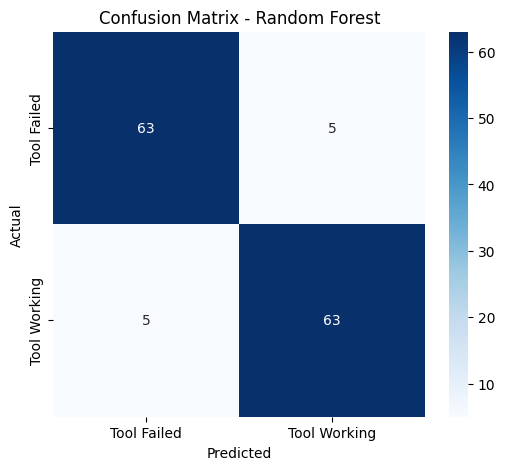

--------------------------------------------------
AUC-ROC for Random Forest: 0.98
--------------------------------------------------


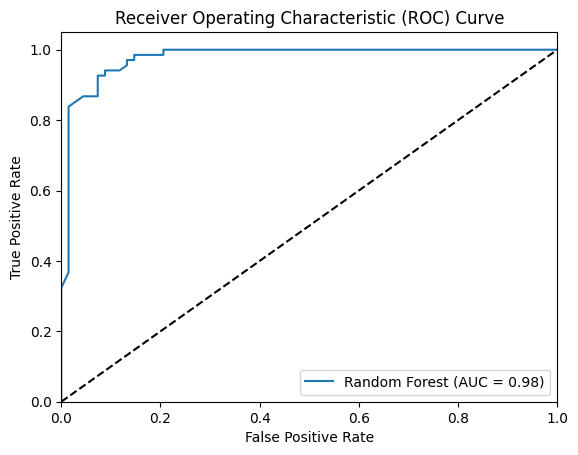

Model: XGBoost
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.93      0.91      0.92        68

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136

--------------------------------------------------


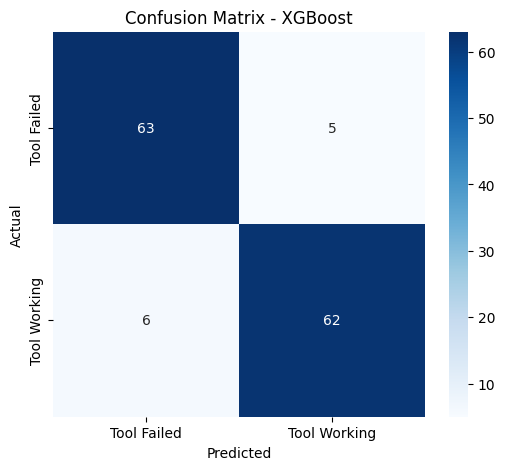

--------------------------------------------------
AUC-ROC for XGBoost: 0.98
--------------------------------------------------


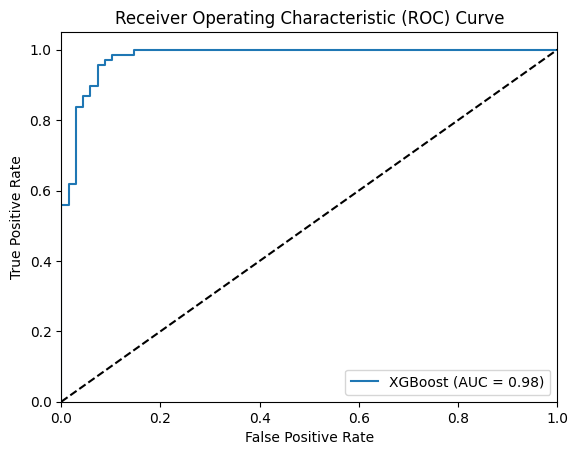

In [21]:
# Define models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_final_numeric, y_train)
    y_pred = model.predict(X_test_final_numeric)
    y_pred_prob = model.predict_proba(X_test_final_numeric)[:, 1]  # Get predicted probabilities for AUC-ROC
    # Confusion Matrix
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tool Failed', 'Tool Working'], yticklabels=['Tool Failed', 'Tool Working'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("-" * 50)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f'AUC-ROC for {name}: {roc_auc:.2f}')
    print("-" * 50)

    # Plot details for all ROC curves
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

### Precision, Recall, F1-Score, and Support

1. **Precision**: The fraction of relevant instances among the retrieved instances. It measures the accuracy of positive predictions.
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

2. **Recall (Sensitivity)**: The fraction of relevant instances that have been retrieved. It measures how well the model captures the positive class.
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

3. **F1-Score**: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially when you need to account for class imbalance.
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

4. **Support**: The number of true instances for each class in the dataset. It reflects how many actual instances there are for each class in the dataset.

### How to Interpret AUC-ROC and ROC

**ROC (Receiver Operating Characteristic) Curve** and **AUC (Area Under the Curve)** are commonly used for evaluating the performance of binary classification models. Here’s how to interpret them:

---

#### 1. **ROC Curve**

The **ROC curve** is a graphical representation of the model's ability to distinguish between the positive and negative classes across all classification thresholds. It plots:

- **True Positive Rate (TPR)** (Sensitivity):  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$  
  Where:
  - $TP$ = True Positives
  - $FN$ = False Negatives

- **False Positive Rate (FPR)**:  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$  
  Where:
  - $FP$ = False Positives
  - $TN$ = True Negatives

The **ROC curve** plots **TPR** (y-axis) against **FPR** (x-axis) at different thresholds.

##### Key Points:
- The **diagonal line** represents random guessing (no discrimination ability).
- A good classifier’s curve will be **above the diagonal**, near the **top-left corner**.

---

#### 2. **AUC (Area Under the Curve)**

**AUC** measures the **area under the ROC curve**.

##### Interpretation of AUC:
- **AUC = 1.0**: Perfect classifier (ideal model).
- **AUC = 0.5**: No discrimination (random guessing).
- **AUC < 0.5**: Worse than random guessing.

##### AUC Values and Performance:
- **0.9 to 1.0**: Excellent performance.
- **0.8 to 0.9**: Good performance.
- **0.7 to 0.8**: Fair performance.
- **0.6 to 0.7**: Poor performance.
- **0.5 to 0.6**: Very poor performance.

---

### Summary:
- **ROC Curve**: Plots **TPR** vs **FPR** at various thresholds to show model discrimination ability.
- **AUC**: Quantifies the overall performance. Higher AUC values indicate better discrimination.


In [23]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_final_numeric, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Logistic Regression Cross-Validation Accuracy: 0.80 ± 0.04
SVM Cross-Validation Accuracy: 0.87 ± 0.02
Decision Tree Cross-Validation Accuracy: 0.87 ± 0.03
Random Forest Cross-Validation Accuracy: 0.90 ± 0.02
XGBoost Cross-Validation Accuracy: 0.90 ± 0.03


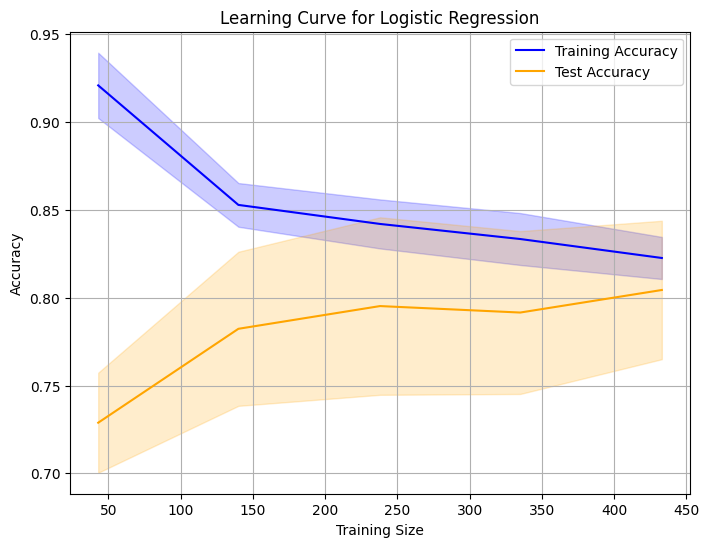

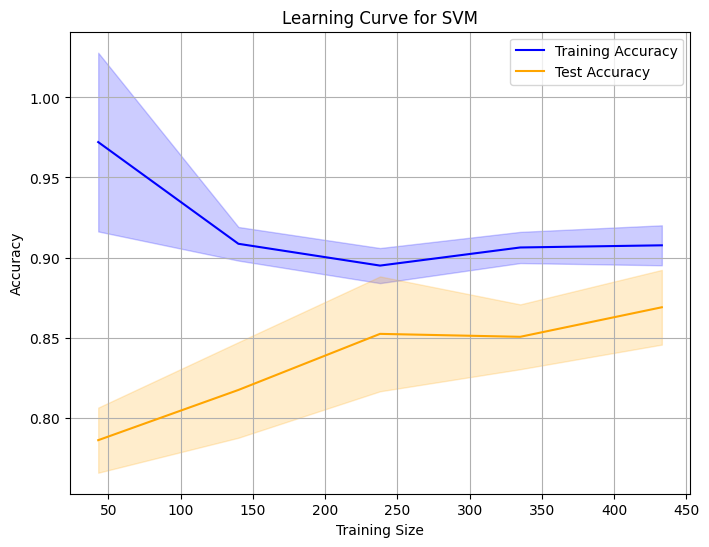

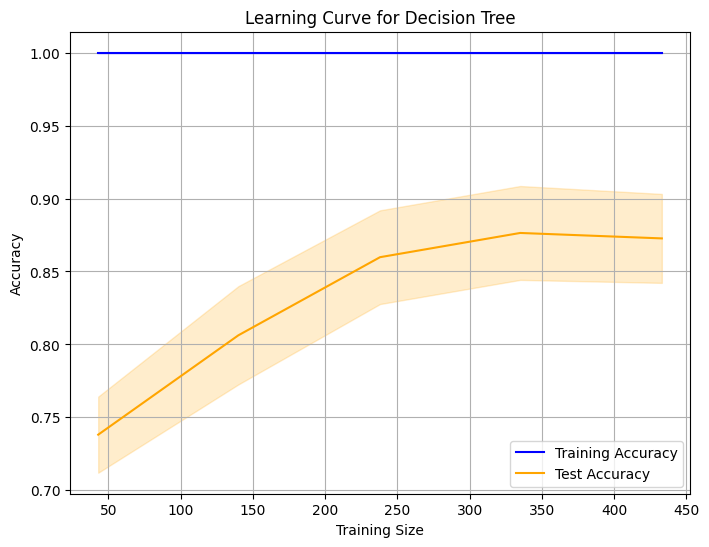

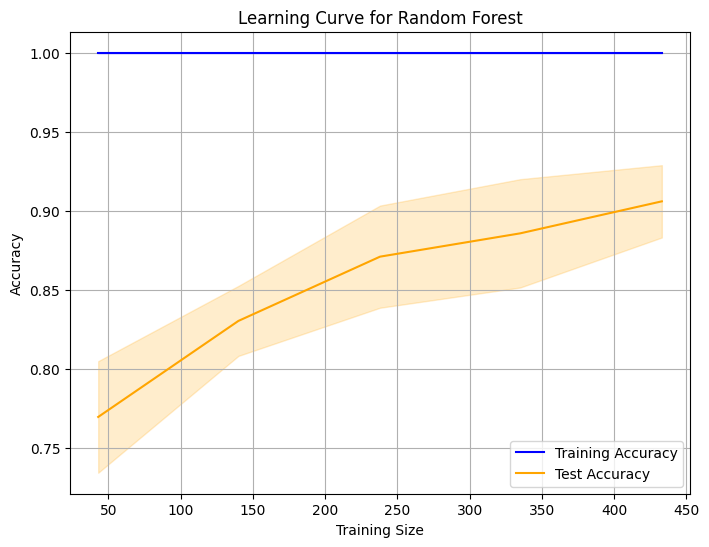

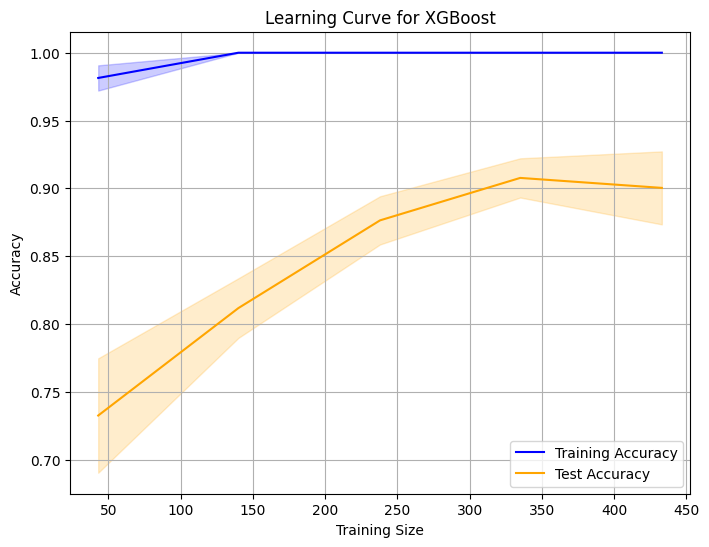

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Iterate through each model in your models dictionary
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_final_numeric, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, test_mean, label='Test Accuracy', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {name}')
    plt.legend()
    plt.grid()
    plt.show()


### Overall Conclusion

- **Random Forest** and **XGBoost** are the top performers based on **AUC-ROC** and **cross-validation accuracy**. However, **Random Forest** shows a high **training accuracy** of **100%**, while the **test accuracy** is around **90%**. This significant difference between training and test accuracy, along with the lack of convergence in the learning curve, suggests that **Random Forest** might be **overfitting** to the training data.
  
- **XGBoost**, in contrast, demonstrates a **more balanced** learning curve, with **training and test accuracies** converging as the training size increases, indicating good **generalization**.

- **SVM** performs **well** with **AUC-ROC of 0.94**, but its **cross-validation accuracy** of **0.85 ± 0.01** is lower compared to the tree-based models, suggesting potential for improvement.

- **Decision Tree** and **Logistic Regression** show acceptable performance but fall behind in both **AUC-ROC** and **cross-validation accuracy** compared to the top models.

### Key Insights:

1. **Random Forest** is at risk of **overfitting** due to its perfect **training accuracy** and much lower **test accuracy**. It may be memorizing the training data instead of learning the underlying patterns.
2. **XGBoost** exhibits **excellent performance** with **balanced learning curves** and **high generalization**, making it the most stable and reliable model.
3. **SVM** shows potential but its **cross-validation score** is lower than the tree-based models, indicating that further optimization could be beneficial.
4. **Decision Tree** and **Logistic Regression** are decent models but are outperformed by the **Random Forest** and **XGBoost** in terms of **AUC-ROC** and **cross-validation accuracy**.

### Recommendations:

1. **Prioritize XGBoost** due to its **high performance**, **balanced learning curve**, and **good generalization**.
2. **Random Forest** may need **hyperparameter tuning** to address the **overfitting** issue, especially through regularization techniques such as adjusting **max depth** or **min samples split**.
3. **SVM** and **Logistic Regression** can be further tuned for better performance, particularly by optimizing **regularization** and **feature selection**.
4. **Cross-validation** results support **XGBoost** and **Random Forest** as the most reliable models, but **Random Forest** should be carefully tuned to avoid overfitting.


### Overall Conclusion

- **Random Forest** and **XGBoost** are the top performers based on **AUC-ROC** and **cross-validation accuracy**. Both models show consistent performance with **cross-validation accuracies** of **0.90 ± 0.00**, indicating **strong generalization** to unseen data.

- **SVM** exhibits **good performance** with **AUC-ROC of 0.94**, but its **cross-validation accuracy** of **0.85 ± 0.01** is lower compared to the tree-based models, suggesting that it may benefit from further optimization to improve its performance and prevent overfitting.

- **Decision Tree** and **Logistic Regression** both perform decently but are **outperformed** by **Random Forest** and **XGBoost** in terms of both **AUC-ROC** and **cross-validation accuracy**. 

### Key Insights:

1. **Random Forest** and **XGBoost** exhibit the **best overall performance**, with both models showing **0.90 ± 0.00** cross-validation accuracy and **high AUC-ROC scores**, indicating they generalize well.
2. **SVM** shows promise but could benefit from additional **optimization** to improve its cross-validation score and reduce **overfitting**.
3. **Decision Tree** shows a **lower AUC-ROC** and **cross-validation accuracy** compared to **Random Forest** and **XGBoost**, suggesting it is less capable of capturing complex patterns in the data.
4. **Logistic Regression** shows a **consistent performance** but **fluctuates** in its learning curve, potentially due to **underfitting** or an inadequate feature set/regularization.

### Recommendations:

1. **Random Forest** and **XGBoost** should be prioritized for production-ready models due to their **high accuracy** and **generalization capabilities**.
2. For **SVM** and **Logistic Regression**, consider adjusting **regularization** or using **feature scaling** to improve consistency and robustness.
3. **Cross-validation** results support that **Random Forest** and **XGBoost** are stable and reliable, confirming the robustness of these models.
